x = 0.00, y ≈ 1.00000
x = 0.10, y ≈ 1.00000
x = 0.20, y ≈ 1.02000
x = 0.30, y ≈ 1.06080
x = 0.40, y ≈ 1.12445
x = 0.50, y ≈ 1.21440


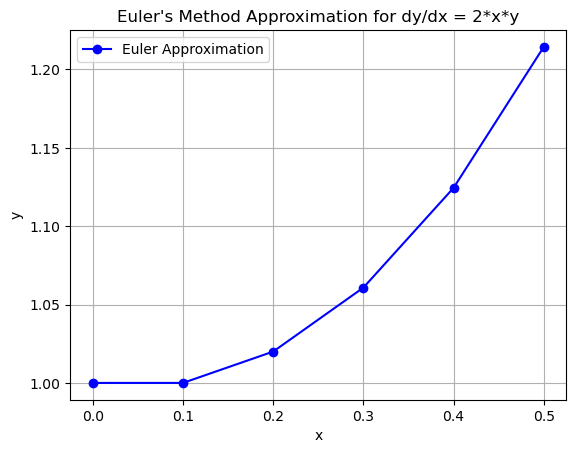

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def create_function(equation_str):
    """
    Converts a string equation into a Python function f(x, y).
    
    Parameters:
        equation_str (str): The equation in terms of x and y, e.g., "x + y"
    
    Returns:
        function: A callable function f(x, y)
    """
    x, y = sp.symbols('x y')
    equation = sp.sympify(equation_str)  # Convert string to symbolic expression
    f_lambdified = sp.lambdify((x, y), equation, 'numpy')  # Convert to Python function
    return f_lambdified

def euler_method(f, x0, y0, h, x_end):
    """ 
    Implements Euler's method for solving dy/dx = f(x, y)
    
    Parameters:
        f: function representing dy/dx
        x0: initial x value
        y0: initial y value
        h: step size
        x_end: endpoint of x values
        
    Returns:
        x_vals: array of x values
        y_vals: array of approximated y values
    """
    # Number of steps
    n_steps = int((x_end - x0) / h)
    
    # Arrays to store (x, y) values
    x_vals = np.linspace(x0, x_end, n_steps + 1)
    y_vals = np.zeros(n_steps + 1)
    
    # Initial condition
    y_vals[0] = y0
    
    # Euler's method iteration
    for i in range(n_steps):
        y_vals[i + 1] = y_vals[i] + h * f(x_vals[i], y_vals[i])
    
    return x_vals, y_vals

# Example: Enter equation as a string
equation_str = "2*x*y"  # You can change this

# Generate function from string
f = create_function(equation_str)

# Initial conditions
x0 = 0
y0 = 1
h = 0.1
x_end = 0.5

# Run Euler's method
x_vals, y_vals = euler_method(f, x0, y0, h, x_end)

# Print results
for i in range(len(x_vals)):
    print(f"x = {x_vals[i]:.2f}, y ≈ {y_vals[i]:.5f}")

# Plot the approximation
plt.plot(x_vals, y_vals, 'bo-', label="Euler Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Euler's Method Approximation for dy/dx = {equation_str}")
plt.legend()
plt.grid(True)
plt.show()
